In [32]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 3.3 MB/s eta 0:01:53
   ---------------------------------------- 1.8/376.0 MB 4.6 MB/s eta 0:01:22
   ---------------------------------------- 3.1/376.0 MB 4.7 MB/s eta 0:01:19
   ---------------------------------------- 3.9/376.0 MB 4.5 MB/s eta 0:01:23
    --------------------------------------- 4.7/376.0 MB 4.4 MB/s eta 0:01:25
    --------------------------------------- 5.5/376.0 MB 4.3 MB/s eta 0:01:27
    --------------------------------------- 6.3/376.0 MB 4.2 MB/s eta 0:01:28
    --------------------------------------- 7.3/376.0 MB 4.2 MB/s eta 0:01:28
    --------------------------------------- 8.1/376.0 MB 4.2 MB/s eta 0:01:28
    --------------------------------------- 8.9/376.0 MB 4.2 MB/s eta 0:01:28


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import numpy as np

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import tkinter as tk
from tkinter import messagebox

np.random.seed(42)
X = np.random.rand(288, 4) * 100  # 4 input: Max coefficients of A, B, C, Ground
y = np.random.randint(0, 2, (288, 4))  # 4 output: Fault (0/1) for each phase

# Məlumatları bölək
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model öyrətmək funksiyası
def train_model():
    global models
    models = []
    accuracies = []
    for i in range(4):  # A, B, C, Ground üçün ayrıca model
        model = LogisticRegression()
        model.fit(X_train_scaled, y_train[:, i])
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test[:, i], preds)
        models.append(model)
        accuracies.append(acc)
    messagebox.showinfo("Model Trained", f"Model öyrədildi!\nDəqiqliklər:\nA: {accuracies[0]*100:.1f}%\n"
                                         f"B: {accuracies[1]*100:.1f}%\nC: {accuracies[2]*100:.1f}%\n"
                                         f"Ground: {accuracies[3]*100:.1f}%")

def test_model():
    # Hazır input nümunəsi (A, B, C, Ground)
    user_input = [100, 20, 60, 15]
    user_input_scaled = scaler.transform([user_input])
    predictions = [model.predict(user_input_scaled)[0] for model in models]
    messagebox.showinfo("Prediction", f"Giriş: {user_input}\n"
                                      f"Nəticə:\nA: {predictions[0]}\nB: {predictions[1]}\n"
                                      f"C: {predictions[2]}\nGround: {predictions[3]}")

root = tk.Tk()
root.title("RBFNN Fault Detector (Sadə Simulyasiya)")

tk.Label(root, text="Bu sistem simulyasiya edilmiş fault datası ilə RBFNN bənzər model qurur.").pack(pady=5)
tk.Button(root, text="Modeli öyrət", command=train_model, width=30, bg='lightgreen').pack(pady=10)
tk.Button(root, text="Hazır input ilə test et", command=test_model, width=30, bg='lightblue').pack(pady=10)

root.mainloop()


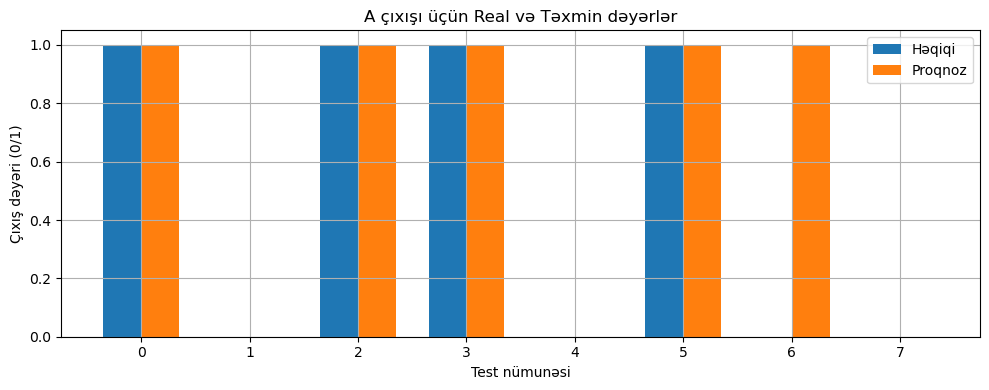

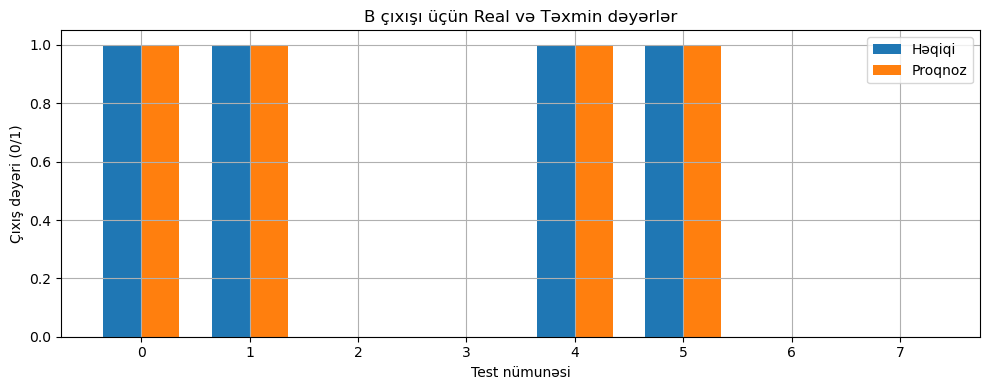

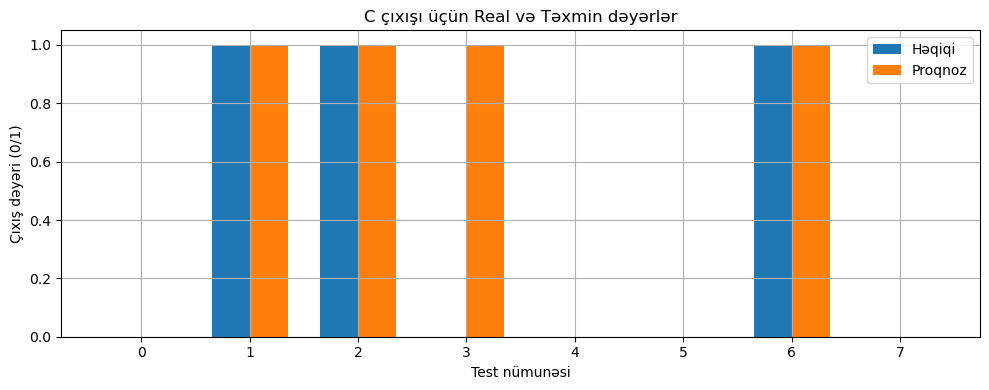

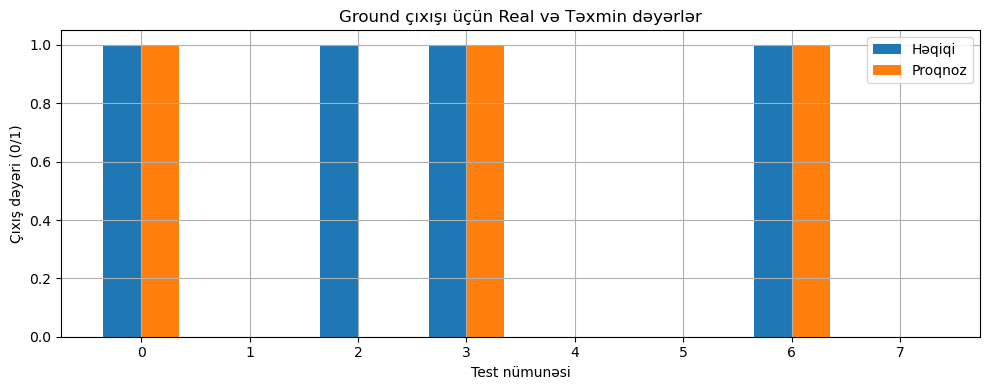

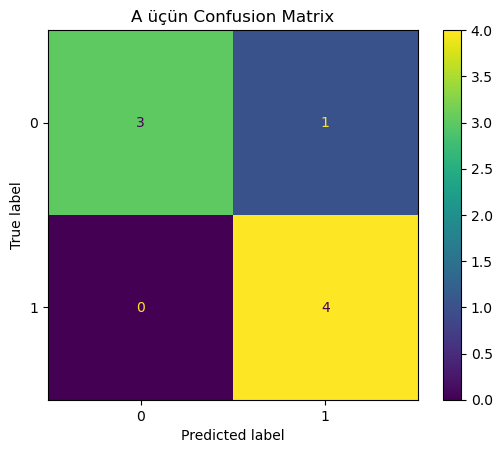

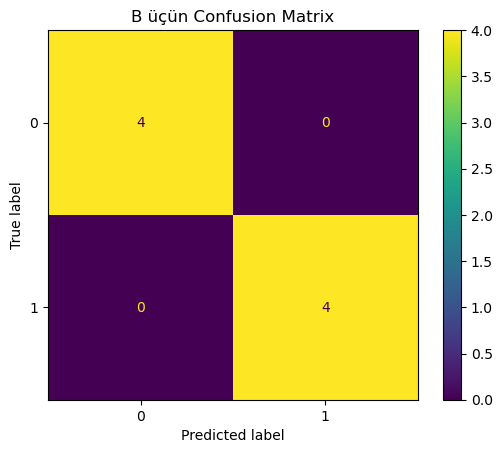

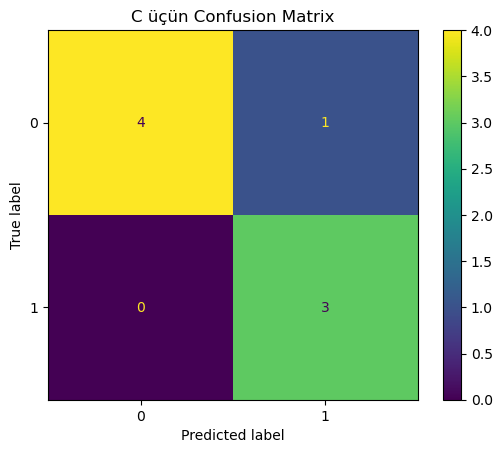

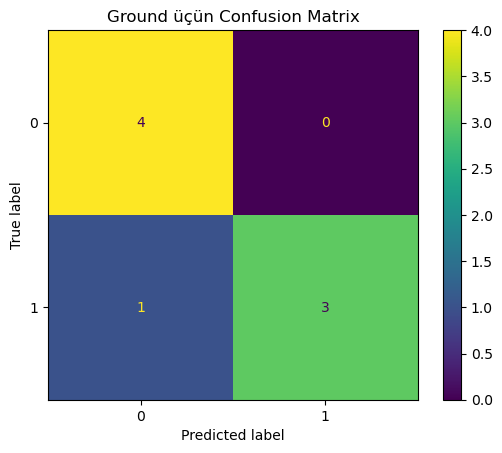

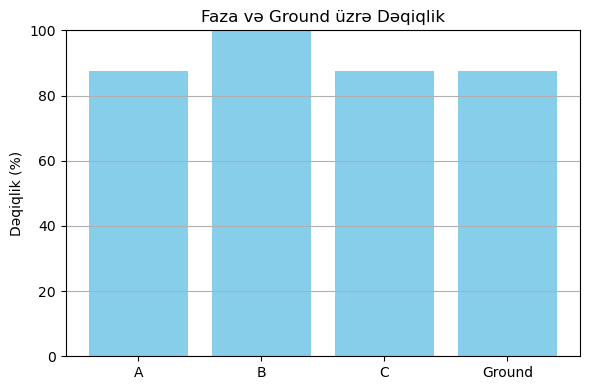

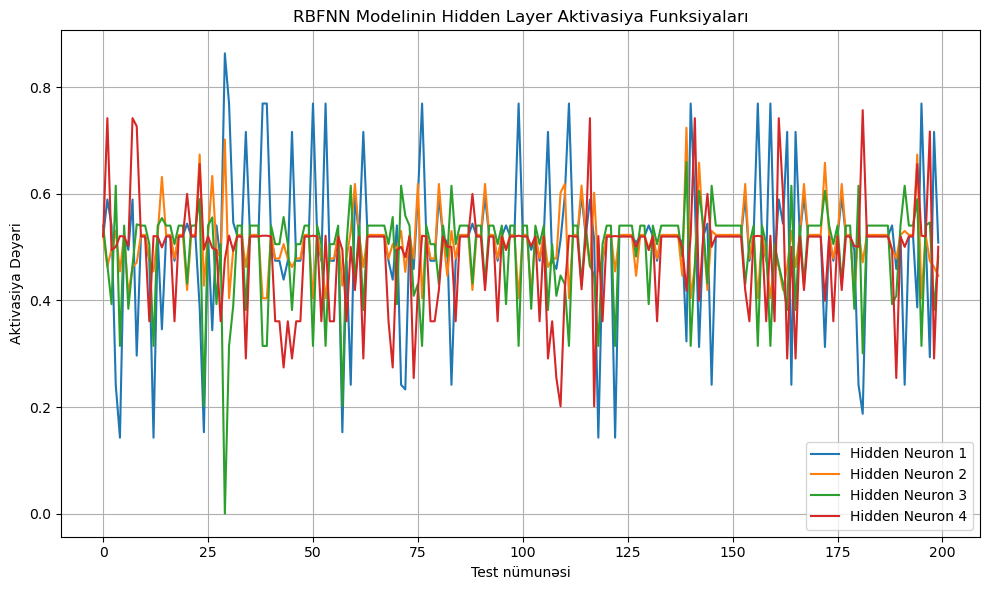

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Simulyasiya edilmiş test nəticələri (məsələn)
T_test = np.array([
    [1, 0, 1, 1, 0, 1, 0, 0],
    [1, 1, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 0, 1, 0]
])

Y_pred = np.array([
    [1, 0, 1, 1, 0, 1, 1, 0],
    [1, 1, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 1, 0]
])

outputs = ['A', 'B', 'C', 'Ground']

# ✅ 1. Real vs. Predicted çıxışlar
for i in range(4):
    plt.figure(figsize=(10, 4))
    bar_width = 0.35
    x = np.arange(len(T_test[i]))
    
    plt.bar(x - bar_width/2, T_test[i], width=bar_width, label='Həqiqi')
    plt.bar(x + bar_width/2, Y_pred[i], width=bar_width, label='Proqnoz')
    plt.title(f'{outputs[i]} çıxışı üçün Real və Təxmin dəyərlər')
    plt.xlabel('Test nümunəsi')
    plt.ylabel('Çıxış dəyəri (0/1)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ✅ 2. Confusion Matrix-lər
for i in range(4):
    cm = confusion_matrix(T_test[i], Y_pred[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f'{outputs[i]} üçün Confusion Matrix')
    plt.show()

# ✅ 3. Dəqiqlik (%) hər çıxış üçün
accuracies = np.mean(Y_pred == T_test, axis=1) * 100

plt.figure(figsize=(6, 4))
plt.bar(outputs, accuracies, color='skyblue')
plt.ylim(0, 100)
plt.ylabel('Dəqiqlik (%)')
plt.title('Faza və Ground üzrə Dəqiqlik')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


hidden_layer_activations = clf.predict_proba(X_test)

plt.figure(figsize=(10, 6))
for i in range(hidden_layer_activations.shape[1]):  # Burada hər neyronu göstəririk
    plt.plot(hidden_layer_activations[:, i], label=f'Hidden Neuron {i+1}')

plt.title('RBFNN Modelinin Hidden Layer Aktivasiya Funksiyaları')
plt.xlabel('Test nümunəsi')
plt.ylabel('Aktivasiya Dəyəri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()